In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('C:\\Users\\M\\Machine_L\\data\\house_price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# nan값 너무 많은 컬럼은 삭제하려고 비율 계산해봄
(df.isnull().sum() / len(df)).sort_values(ascending = False).head(5)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
dtype: float64

### nan값 비율이 높은 컬럼 상위 6개 따로 지정 후 삭제

In [13]:
drop_cols = (df.isnull().sum() / len(df)).sort_values(ascending = False).head(6).index

In [14]:
df.drop(drop_cols, axis = 1, inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### 나머지 컬럼의 nana값 처리
1. 데이터(row), 컬럼 제거
2. nan값을 채우는 방식
   2-1. 컬럼이 numeric : mean(), interpolate(), ffill(), bfill(), 계산되는 값으로 채우는 방법\
   2-2. 컬럼이 non-numeric(category data) : mode(), ffill(), bfill(), 계산되는 값으로 채우는 방법\
        ** one-hot encoding을 하면 nan값이 자동으로 처리 된다.(2-2의 경우)\
           => 따라서 따로 nan값 처리 안해도 된다!

In [17]:
df.isnull().sum(axis = 1).sort_values(ascending = False)

39      10
520     10
1179    10
533     10
1011    10
        ..
554      0
552      0
551      0
550      0
1459     0
Length: 1460, dtype: int64

In [18]:
s = pd.Series(['a', 'b', 'c', 'a', 'b', np.nan])
pd.get_dummies(s, dtype = int)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
5,0,0,0


In [ ]:
# 컬럼 타입별로 쪼개기

In [21]:
# numeric type
df_nums = df.select_dtypes(include = ['int', 'float'])
df_nums.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [22]:
# object type
df_cat = df.select_dtypes(include = ['object'])
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [23]:
#df_nums : 컬럼의 평균값으로 nan값을 채운다
df_nums = df_nums.fillna(df_nums.mean())

In [25]:
#df_cat : one-hot encoding으로 nan값을 채운다
df_cat = pd.get_dummies(df_cat, dtype = int)

### 각 각 처리한 데이터 프레임 붙이기

In [26]:
df_con = pd.concat([df_nums, df_cat], axis = 1)

In [30]:
# nan값 처리 한거 확인
df_con.isnull().sum().sum()

0

In [32]:
from IPython.display import display
pd.options.display.max_columns = 100

In [33]:
df_con.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,0,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,1,0,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,1,0,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [35]:
#2. X, y 나누기
X = df_con.drop(['SalePrice', 'Id'], axis = 1)
y = df_con.SalePrice

In [38]:
#3. train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2024)

In [40]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [44]:
# 4. 모델학습
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import r2_score, mean_squared_error

In [45]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

rf = RandomForestRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)
lgbm = LGBMRegressor(random_state = 42)
cat = CatBoostRegressor(random_state = 42)

In [52]:
algos = [lr, ridge, lasso, rf, xgb, lgbm, cat]

for algo in algos:
  algo.fit(X_train, y_train)
  y_pred = algo.predict(X_test)
  print(algo.__class__.__name__, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
  print()

LinearRegression 1873910766.4795253 0.688576296377168

Ridge 1721178537.2382674 0.7139587411251868



C:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.328e+11, tolerance: 7.012e+08
  model = cd_fast.enet_coordinate_descent(


Lasso 1828251342.883515 0.6961643987862636

RandomForestRegressor 894784234.7979873 0.8512965369916639

XGBRegressor 846706545.7234972 0.8592865289704886

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3093
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 164
[LightGBM] [Info] Start training from score 180997.761644
LGBMRegressor 902915878.2162678 0.8499451457967573

Learning rate set to 0.041534
0:	learn: 77941.1390265	total: 151ms	remaining: 2m 30s
1:	learn: 75953.1812878	total: 161ms	remaining: 1m 20s
2:	learn: 74040.7015964	total: 172ms	remaining: 57.1s
3:	learn: 72236.0065247	total: 182ms	remaining: 45.4s
4:	learn: 70639.0482345	total: 188ms	remaining: 37.5s


In [53]:
# scale adjust

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [55]:
# log scaling : X, y에 모두 적용 가능함

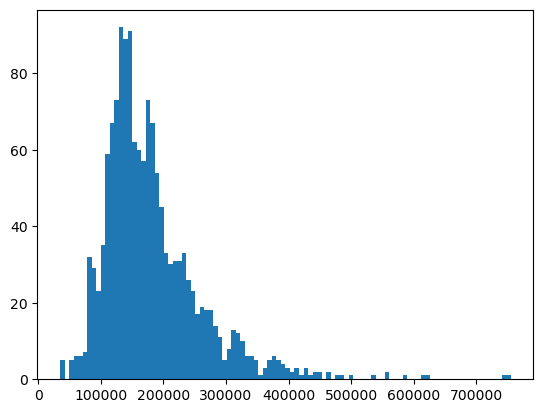

In [56]:
plt.hist(y, bins = 100)
plt.show()

In [60]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
# 주의 - log에 0 넣으면 오류니까 log1p 해줌 (1을 더해서 log를 씌운다는 뜻)

In [76]:
# X,y 둘다 log 스케일링 수행 결과
algos = [lr, ridge, lasso, rf, xgb, lgbm, cat]

for algo in algos:
  algo.fit(X_train_sc, y_train_log)
  y_pred_log = algo.predict(X_test_sc)
  print(algo.__class__.__name__, mean_squared_error(y_test_log, y_pred_log), r2_score(y_test_log, y_pred_log))
  print()

LinearRegression 1.1231402403515061e+21 -7.405186650089085e+21

Ridge 0.032209422376390254 0.7876340139731101

Lasso 0.15167546903428505 -3.9993302321850166e-05

RandomForestRegressor 0.01928174794318761 0.8728698898593567

XGBRegressor 0.01937438538852589 0.8722591045372114

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3087
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 164
[LightGBM] [Info] Start training from score 12.023442
LGBMRegressor 0.01767430748439219 0.8834682071474627

Learning rate set to 0.041534
0:	learn: 0.3912637	total: 5.98ms	remaining: 5.97s
1:	learn: 0.3814847	total: 10.7ms	remaining: 5.36s
2:	learn: 0.3716443	total: 16.8ms	remaining: 5.59s
3:	learn: 0.3617776	total: 22.4ms	remaining: 5.58s
4:	learn: 0.3531507	total: 27.3ms	remaining: 5.42s
5:	learn: 0.3438771	total: 33.5ms	remaini

In [61]:
X_train_sc

array([[0.23529412, 0.16797931, 0.10712537, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.26027397, 0.07454701, ..., 0.        , 1.        ,
        0.        ],
       [0.05882353, 0.11986301, 0.0468903 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.16797931, 0.06196743, ..., 0.        , 1.        ,
        0.        ],
       [0.58823529, 0.14041096, 0.06964373, ..., 0.        , 1.        ,
        0.        ],
       [0.29411765, 0.19520548, 0.06652791, ..., 0.        , 0.        ,
        0.        ]])

In [62]:
X_train_sc = pd.DataFrame(X_train_sc)
X_test_sc = pd.DataFrame(X_test_sc)
X_train_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265
0,0.235294,0.167979,0.107125,0.555556,0.500,0.753623,0.433333,0.102564,0.315044,0.0,0.039015,0.248284,0.157567,0.379661,0.0,0.285583,0.5,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.666667,0.50,0.407194,0.415761,0.202925,0.000000,0.0,0.0,0.0,0.0,0.545455,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.235294,0.260274,0.074547,1.000000,0.500,0.985507,0.966667,0.358974,0.592035,0.0,0.178356,0.537118,0.481686,0.275061,0.0,0.451865,0.5,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,0.980392,0.75,0.605755,0.519022,0.500914,0.000000,0.0,0.0,0.0,0.0,0.454545,0.75,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.058824,0.119863,0.046890,0.444444,0.625,0.398551,0.000000,0.000000,0.000000,0.0,0.468184,0.314410,0.239806,0.000000,0.0,0.159834,0.0,0.0,0.333333,0.0,0.250,0.333333,0.250000,0.333333,0.186275,0.50,0.258993,0.000000,0.000000,0.235507,0.0,0.0,0.0,0.0,0.181818,1.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.239726,0.055932,0.777778,0.625,0.891304,0.750000,0.564103,0.750442,0.0,0.191825,0.657829,0.614720,0.000000,0.0,0.409719,0.5,0.0,0.666667,0.5,0.250,0.333333,0.416667,0.333333,0.852941,0.75,0.603597,0.320652,0.084095,0.000000,0.0,0.0,0.0,0.0,0.636364,0.50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.235294,0.167808,0.045605,0.555556,0.500,0.913043,0.800000,0.099145,0.223451,0.0,0.138876,0.250780,0.162405,0.425182,0.0,0.310456,0.0,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.000000,0.882353,0.50,0.376259,0.000000,0.140768,0.000000,0.0,0.0,0.0,0.0,0.454545,1.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
# 왜도 skew값 계산하는 함수 적용
cols_skews = X_train_sc.apply(lambda x: x.skew())
high_skews_cols = cols_skews[(cols_skews>1) & (cols_skews<30)].index

In [77]:
# 왜도 값이 높은 애들만 뽑아서 로그 스케일링 한번 더
X_train_sc[high_skews_cols] = np.log1p(X_train_sc[high_skews_cols])
X_test_sc[high_skews_cols] = np.log1p(X_test_sc[high_skews_cols])

In [78]:
# 왜도 값 높은애들 뽑아서 로그 스케일링 한 후의 결과값
algos = [lr, ridge, lasso, rf, xgb, lgbm, cat]

for algo in algos:
  algo.fit(X_train_sc, y_train_log)
  y_pred_log = algo.predict(X_test_sc)
  print(algo.__class__.__name__, mean_squared_error(y_test_log, y_pred_log), r2_score(y_test_log, y_pred_log))
  print()
#결과는 비슷하게 나옴ㅠㅜ

LinearRegression 3.988902593914803e+20 -2.6299982117744285e+21

Ridge 0.03063822404628498 0.7979933764825473

Lasso 0.15167546903428505 -3.9993302321850166e-05

RandomForestRegressor 0.019285241211454838 0.8728468577369126

XGBRegressor 0.01937438538852589 0.8722591045372114

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3087
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 164
[LightGBM] [Info] Start training from score 12.023442
LGBMRegressor 0.01767430748439219 0.8834682071474627

Learning rate set to 0.041534
0:	learn: 0.3912637	total: 4.64ms	remaining: 4.63s
1:	learn: 0.3814847	total: 9.32ms	remaining: 4.65s
2:	learn: 0.3716443	total: 14.1ms	remaining: 4.69s
3:	learn: 0.3617776	total: 26.5ms	remaining: 6.59s
4:	learn: 0.3531507	total: 31.3ms	remaining: 6.23s
5:	learn: 0.3438771	total: 35.8ms	remaini

In [83]:
X_train_sc.index = X_train_sc.index + 1000
# 인덱스 구별하기 위해서 + 1000해줌

In [85]:
X_con = pd.concat([X_train_sc, X_test_sc])

In [79]:
# 이상치(outlier) 제거

In [101]:
outlier_idx = []
def remove_outlier(col):
  q1 = col.quantile(0.25)
  q3 = col.quantile(0.75)
  iqr = q3 - q1

  upper_limit = q3 + iqr*3
  lower_limit = q1 - iqr*3

  outlier_idx.append(col[(col > upper_limit) | (col  < lower_limit)].index.to_list())
  return outlier_idx

In [102]:
outlier_idx @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

[]

In [88]:
df_outlier_idx = []
for col in X_con.columns :
    df_outlier_idx = df_outlier_idx + remove_outlier(X_con[col])

In [ ]:
df_outlier_idx = set(df_outlier_idx[0]) @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [99]:
drop_idx = np.array(df_outlier_idx)

In [ ]:
drop_test_idx = drop_idx[drop_idx < 1000]
drop_train_idx = drop_idx[drop_idx >= 1000]

In [ ]:
x_train_sc.drop(drop_train_idx, inplace=True)
x_test_sc.drop(drop_test_idx, inplace=True)

In [ ]:
y_train_log.reset_index(inplace)

In [ ]:
y_train_log.index =  y_train_log.index + 1000

In [ ]:
y_train_log = pd.DataFrame(y_train_log).reset_index(inplace = True)
y_test_log = pd.DataFrame(y_test_log).reset_index(inplace = True)
# 판다스라 시리즈 적용이 안된다ㅠㅡㅠ
# 그래서 pd.DataFrame() 사용